In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
import os

In [2]:
import matplotlib.pyplot as plt

In [22]:
data = os.path.join(os.getcwd(),'ner_dataset.csv')
encoding = encoding = "ISO-8859-1"
df = pd.read_csv(data,encoding=encoding)
df = df[:100000]
df.head()

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,NaN,of,IN,O
2,NaN,demonstrators,NNS,O
3,NaN,have,VBP,O
4,NaN,marched,VBN,O


In [23]:
df['Sentence #'].nunique()

4544

In [24]:
df.isnull().sum()

Sentence #    95456
Word              0
POS               0
Tag               0
dtype: int64

In [25]:
df = df.fillna(method='ffill')

In [26]:
df = df.rename(mapper={'Sentence #': 'sentence','Tag':'tag','Word':'word'},axis=1)
#Have to use df = df.rename() to overwrite memory for form of df

In [27]:
df.groupby('tag').size().reset_index(name='counts')

,tag,counts
0,B-art,75
1,B-eve,53
2,B-geo,3303
3,B-gpe,1740
4,B-nat,30
5,B-org,1876
6,B-per,1668
7,B-tim,1823
8,I-art,43
9,I-eve,47


In [28]:
counts = df.groupby('tag').size().reset_index(name='counts')
print(counts)

      tag  counts
0   B-art      75
1   B-eve      53
2   B-geo    3303
3   B-gpe    1740
4   B-nat      30
5   B-org    1876
6   B-per    1668
7   B-tim    1823
8   I-art      43
9   I-eve      47
10  I-geo     690
11  I-gpe      51
12  I-nat      11
13  I-org    1470
14  I-per    1846
15  I-tim     549
16      O   84725


**There is an uneven distribution of classes**

Text(0, 0.5, 'Log Count')

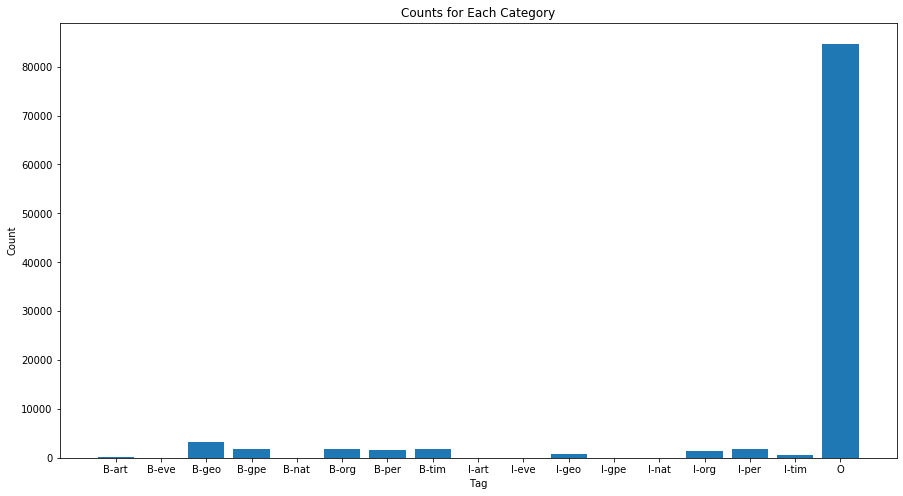

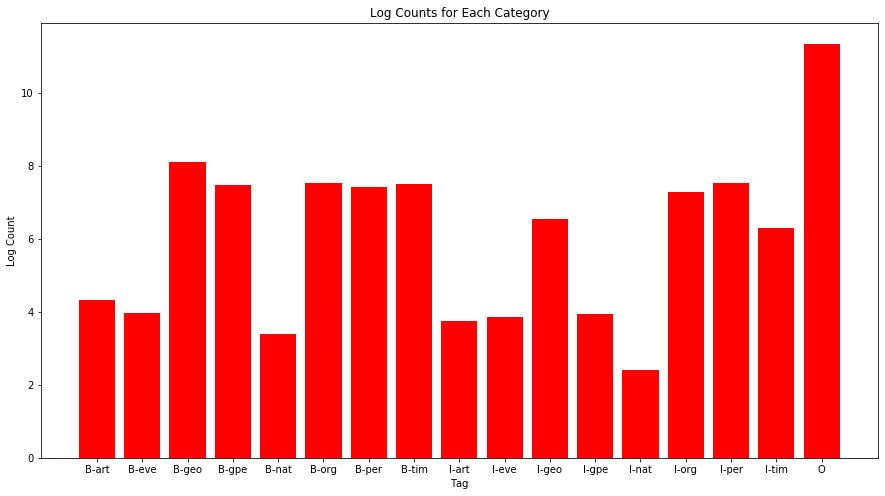

In [29]:
plt.figure(1,figsize=(15,8))
plt.bar(counts['tag'],counts['counts'])
plt.title('Counts for Each Category')
plt.xlabel('Tag')
plt.ylabel('Count')

plt.figure(2,figsize=(15,8))
plt.bar(counts['tag'],np.log(counts['counts']),color='r')
plt.title('Log Counts for Each Category')
plt.xlabel('Tag')
plt.ylabel('Log Count')

In [30]:
X = df.drop('tag',axis=1)
X.head()

,sentence,word,POS
0,Sentence: 1,Thousands,NNS
1,Sentence: 1,of,IN
2,Sentence: 1,demonstrators,NNS
3,Sentence: 1,have,VBP
4,Sentence: 1,marched,VBN


In [31]:
v = DictVectorizer(sparse='False')
X = v.fit_transform(X.to_dict('records'))
y = df.tag.values

In [39]:
classes = np.unique(y)
classes = classes.tolist()

new_classes = classes.copy()
new_classes.pop()
new_classes
#Use pop to remove the last clas from the list which is the none tag

['B-art',
 'B-eve',
 'B-geo',
 'B-gpe',
 'B-nat',
 'B-org',
 'B-per',
 'B-tim',
 'I-art',
 'I-eve',
 'I-geo',
 'I-gpe',
 'I-nat',
 'I-org',
 'I-per',
 'I-tim']

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=0)
X_train.shape,y_train.shape

((67000, 15507), (67000,))

In [34]:
per = Perceptron(verbose=10,n_jobs=-1,max_iter=5)
per.partial_fit(X_train, y_train, classes)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  17 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  14 out of  17 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    0.1s finished


-- Epoch 1-- Epoch 1
-- Epoch 1

-- Epoch 1
Norm: 10.34, NNZs: 107, Bias: -0.210000, T: 67000, Avg. loss: 0.000988
Total training time: 0.02 seconds.
Norm: 13.49, NNZs: 173, Bias: -0.240000, T: 67000, Avg. loss: 0.001384-- Epoch 1
Total training time: 0.03 seconds.

-- Epoch 1
Norm: 51.94, NNZs: 2108, Bias: -0.460000, T: 67000, Avg. loss: 0.026206
Norm: 35.20, NNZs: 939, Bias: -0.450000, T: 67000, Avg. loss: 0.010033
Total training time: 0.04 seconds.
Total training time: 0.02 seconds.
-- Epoch 1
-- Epoch 1
Norm: 8.00, NNZs: 61, Bias: -0.140000, T: 67000, Avg. loss: 0.000451
Total training time: 0.01 seconds.
-- Epoch 1
Norm: 45.84, NNZs: 1711, Bias: -0.490000, T: 67000, Avg. loss: 0.022530
Total training time: 0.03 seconds.
-- Epoch 1
Norm: 34.19, NNZs: 913, Bias: -0.410000, T: 67000, Avg. loss: 0.012243
Total training time: 0.02 seconds.
Norm: 39.87, NNZs: 1416, Bias: -0.400000, T: 67000, Avg. loss: 0.014701-- Epoch 1

Total training time: 0.02 seconds.
Norm: 10.58, NNZs: 109, Bias: 

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
      fit_intercept=True, max_iter=5, n_iter=None, n_iter_no_change=5,
      n_jobs=-1, penalty=None, random_state=0, shuffle=True, tol=None,
      validation_fraction=0.1, verbose=10, warm_start=False)

In [38]:
print(classification_report(y_pred=per.predict(X_test),y_true=y_test,labels=new_classes))

              precision    recall  f1-score   support

       B-art       0.10      0.17      0.12        24
       B-eve       0.00      0.00      0.00        19
       B-geo       0.45      0.89      0.59      1085
       B-gpe       0.96      0.75      0.84       556
       B-nat       0.18      0.17      0.17        12
       B-org       0.63      0.23      0.33       589
       B-per       0.82      0.37      0.51       564
       B-tim       0.84      0.70      0.76       611
       I-art       0.02      0.17      0.04        12
       I-eve       0.50      0.06      0.10        18
       I-geo       0.50      0.02      0.03       230
       I-gpe       0.02      0.07      0.03        14
       I-nat       0.00      1.00      0.01         2
       I-org       0.62      0.45      0.52       445
       I-per       0.88      0.06      0.11       591
       I-tim       0.26      0.07      0.11       194

   micro avg       0.50      0.49      0.49      4966
   macro avg       0.42   

**Use Sci-kit learns classification report for multi-class classification**

In [42]:
sgd = SGDClassifier()
sgd.partial_fit(X_train,y_train,classes)
print(classification_report(y_pred=sgd.predict(X_test),y_true=y_test,labels=new_classes))

              precision    recall  f1-score   support

       B-art       0.25      0.04      0.07        24
       B-eve       0.50      0.05      0.10        19
       B-geo       0.47      0.92      0.62      1085
       B-gpe       0.90      0.63      0.74       556
       B-nat       1.00      0.17      0.29        12
       B-org       0.63      0.38      0.47       589
       B-per       0.88      0.40      0.55       564
       B-tim       0.91      0.67      0.77       611
       I-art       0.00      0.00      0.00        12
       I-eve       0.00      0.00      0.00        18
       I-geo       0.74      0.47      0.58       230
       I-gpe       0.00      0.00      0.00        14
       I-nat       0.12      0.50      0.20         2
       I-org       0.70      0.46      0.55       445
       I-per       0.72      0.50      0.59       591
       I-tim       0.40      0.02      0.04       194

   micro avg       0.63      0.57      0.60      4966
   macro avg       0.51   

In [44]:
nb = MultinomialNB(alpha=0.01)
nb.partial_fit(X_train,y_train,classes)
nb_report = classification_report(y_pred=nb.predict(X_test),y_true=y_test,labels=new_classes)
print(nb_report)

              precision    recall  f1-score   support

       B-art       0.06      0.17      0.09        24
       B-eve       0.33      0.37      0.35        19
       B-geo       0.70      0.63      0.66      1085
       B-gpe       0.70      0.83      0.76       556
       B-nat       0.35      0.50      0.41        12
       B-org       0.41      0.44      0.43       589
       B-per       0.44      0.47      0.46       564
       B-tim       0.56      0.61      0.59       611
       I-art       0.07      0.08      0.08        12
       I-eve       0.46      0.33      0.39        18
       I-geo       0.40      0.52      0.46       230
       I-gpe       0.13      0.14      0.14        14
       I-nat       0.00      0.00      0.00         2
       I-org       0.50      0.51      0.51       445
       I-per       0.53      0.50      0.51       591
       I-tim       0.17      0.27      0.21       194

   micro avg       0.52      0.56      0.54      4966
   macro avg       0.36   

In [46]:
pa =PassiveAggressiveClassifier()
pa.partial_fit(X_train, y_train, classes)
pa_report = classification_report(y_pred=pa.predict(X_test),y_true=y_test,labels=new_classes)
print(pa_report)

              precision    recall  f1-score   support

       B-art       1.00      0.04      0.08        24
       B-eve       0.33      0.32      0.32        19
       B-geo       0.77      0.62      0.69      1085
       B-gpe       0.94      0.78      0.85       556
       B-nat       0.67      0.17      0.27        12
       B-org       0.26      0.68      0.38       589
       B-per       0.77      0.44      0.56       564
       B-tim       0.84      0.71      0.77       611
       I-art       0.25      0.17      0.20        12
       I-eve       0.67      0.11      0.19        18
       I-geo       0.70      0.51      0.59       230
       I-gpe       0.19      0.50      0.28        14
       I-nat       0.25      0.50      0.33         2
       I-org       0.59      0.46      0.52       445
       I-per       0.74      0.41      0.53       591
       I-tim       0.43      0.16      0.23       194

   micro avg       0.60      0.57      0.58      4966
   macro avg       0.59   

In [52]:
import sklearn_crfsuite
from sklearn_crfsuite import scorers
from sklearn_crfsuite import metrics
from collections import Counter

In [57]:
class SentenceGetter(object):
    
    def __init__(self, data):
        self.n_sent = 1
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, p, t) for w, p, t in zip(s['word'].values.tolist(), 
                                                           s['POS'].values.tolist(), 
                                                           s['tag'].values.tolist())]
        self.grouped = self.data.groupby('sentence').apply(agg_func)
        self.sentences = [s for s in self.grouped]
        
    def get_next(self):
        try: 
            s = self.grouped['Sentence: {}'.format(self.n_sent)]
            self.n_sent += 1
            return s 
        except:
            return None

In [58]:
getter = SentenceGetter(df)

In [61]:
sent = getter.get_next()
print(sent)

[('Thousands', 'NNS', 'O'), ('of', 'IN', 'O'), ('demonstrators', 'NNS', 'O'), ('have', 'VBP', 'O'), ('marched', 'VBN', 'O'), ('through', 'IN', 'O'), ('London', 'NNP', 'B-geo'), ('to', 'TO', 'O'), ('protest', 'VB', 'O'), ('the', 'DT', 'O'), ('war', 'NN', 'O'), ('in', 'IN', 'O'), ('Iraq', 'NNP', 'B-geo'), ('and', 'CC', 'O'), ('demand', 'VB', 'O'), ('the', 'DT', 'O'), ('withdrawal', 'NN', 'O'), ('of', 'IN', 'O'), ('British', 'JJ', 'B-gpe'), ('troops', 'NNS', 'O'), ('from', 'IN', 'O'), ('that', 'DT', 'O'), ('country', 'NN', 'O'), ('.', '.', 'O')]


In [62]:
sentences = getter.sentences